# IMBD : interprétation de texte

1. le but de cet exemple est de décider si une critique de film est positive ou négative en fonction de commentaires du film
2. le codage des commentaires est expliqué dans le shéma ci-dessous
3. le modèle doit trancher si l'avis au global est négatif-0 ou positif-1

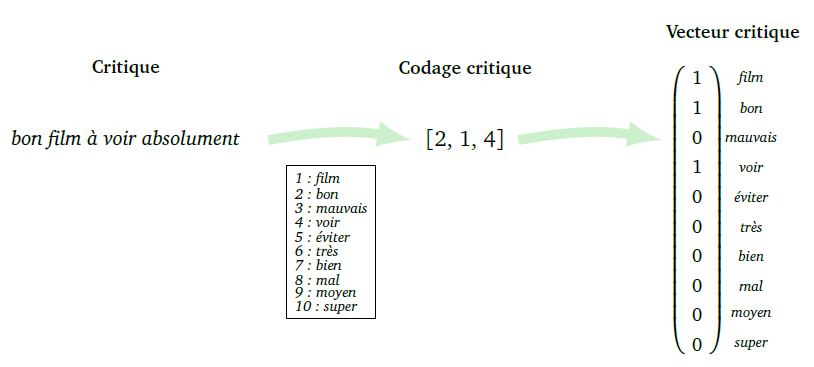

## 1. modules à charger

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 2. Données

In [ ]:
from tensorflow.keras.datasets import imdb

nb_mots_total = 1000   # On ne garde que les n=1000 mots les plus fréquents 
(X_train_data, Y_train), (X_test_data, Y_test) = imdb.load_data(num_words=nb_mots_total)

17464789/17464789 [==============================] - 2s 0us/step


In [ ]:
# Afficher une critique et sa note 
def affiche_texte(num):
    index_mots = imdb.get_word_index()
    index_mots_inverse = dict([(value, key) for (key, value) in index_mots.items()])
    critique_mots = ' '.join([index_mots_inverse.get(i - 3, '??') for i in X_train_data[num]])
    print("Critique :\n", critique_mots)
    print("Note 0 (négatif) ou 1 (positif) ? :", Y_train[num])
    print("Critique (sous forme brute) :\n", X_train_data[num])
    return

affiche_texte(123)   # affichage de la critique numéro 123

1641221/1641221 [==============================] - 0s 0us/step
Critique :
 ?? beautiful and ?? movie ?? ?? great ?? good acting and one of the most ?? movies i have seen in a while i never saw such an interesting setting when i was in ?? my wife liked it so much she ?? me to ?? on and rate it so other would enjoy too
Note 0 (négatif) ou 1 (positif) ? : 1
Critique (sous forme brute) :
 [1, 307, 5, 2, 20, 2, 2, 87, 2, 52, 116, 5, 31, 7, 4, 91, 2, 102, 13, 28, 110, 11, 6, 137, 13, 115, 219, 141, 35, 221, 956, 54, 13, 16, 11, 2, 61, 322, 423, 12, 38, 76, 59, 2, 72, 8, 2, 23, 5, 967, 12, 38, 85, 62, 358, 99]


In [ ]:
# Données sous forme de vecteurs
def vectorisation_critiques(X_data):
    vecteurs = np.zeros((len(X_data), nb_mots_total))
    for i in range(len(X_data)):
        for c in X_data[i]:
            vecteurs[i,c] = 1.0
    return vecteurs

X_train = vectorisation_critiques(X_train_data)
X_test = vectorisation_critiques(X_test_data)

## 3. Réseau

In [ ]:
modele = Sequential()
p = 5
modele.add(Dense(p, input_dim=nb_mots_total, activation='relu'))
modele.add(Dense(p, activation='relu'))
modele.add(Dense(p, activation='relu'))
modele.add(Dense(1, activation='sigmoid'))
modele.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

## 4. Entrainement du modèle

In [ ]:
modele.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
782/782 [==============================] - 9s 4ms/step - loss: 0.6924 - accuracy: 0.5225
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.6692 - accuracy: 0.6273
Epoch 3/10
782/782 [==============================] - 3s 3ms/step - loss: 0.4894 - accuracy: 0.7847
Epoch 4/10
782/782 [==============================] - 3s 3ms/step - loss: 0.3652 - accuracy: 0.8423
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.3352 - accuracy: 0.8566
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 0.3229 - accuracy: 0.8650
Epoch 7/10
782/782 [==============================] - 3s 3ms/step - loss: 0.3167 - accuracy: 0.8683
Epoch 8/10
782/782 [==============================] - 3s 3ms/step - loss: 0.3136 - accuracy: 0.8687
Epoch 9/10
782/782 [==============================] - 3s 3ms/step - loss: 0.3114 - accuracy: 0.8692
Epoch 10/10
782/782 [==============================] - 4s 5ms/step - loss: 0.3083 - accuracy: 0.8718

## 5. Résultats

In [ ]:
Y_predict = modele.predict(X_test)

782/782 [==============================] - 1s 2ms/step


## Afficher une critique et sa note 

In [ ]:
def affiche_texte_test(num):
    index_mots = imdb.get_word_index()
    index_mots_inverse = dict([(value, key) for (key, value) in index_mots.items()])
    critique_mots = ' '.join([index_mots_inverse.get(i - 3, '??') for i in X_test_data[num]])
    print("Critique :\n", critique_mots)
    print("Note attendue 0 (négatif) ou 1 (positif) ? :", Y_test[num])
    print("Note prédite 0 (négatif) ou 1 (positif) ? :", Y_predict[num][0])
    return

affiche_texte_test(111)   # prédiction pour la critique test numéro 111

Critique :
 ?? i at first thought this little fantasy ?? would be a little entertaining i was wrong br br a good cast ?? ?? as the ?? didn't help it any the story had every ?? possible worst case ?? that could take place in a ?? ?? ?? and none of it could possibly happen br br true the ?? of the ?? could only be ?? with the ?? help of a ?? in the ?? ?? ?? air ?? one but everything they ?? ?? the ?? and the ?? of our country if were to fall into ?? hands is ?? to the ?? ?? seriously not even the ?? can ?? over ?? our ?? ?? the case is only used to ?? ?? in this situation our ?? would have completely ?? the ?? and the whole thing would go ?? the ?? of ?? couldn't happen there would not have been a ?? ?? because the ?? ?? would have been ?? not to ?? ?? a ?? there are just too many ?? ?? to ?? such a thing from ?? br br true film's like ?? ?? and ?? gave some ?? to the ?? of us ?? ?? of the ?? but this film goes too far and fails to ?? my ?? of the ?? and that makes the experience a waste